In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import scikit_posthocs

import seaborn as sns
sns.set(rc={'figure.figsize':[12,8]})

# Reading data
df = pd.read_pickle('STING_DB.pkl')

# Ordering levels and creating new variables
df['grade'] = df['lesion'].replace({'Non-tumor':np.nan,'CIS':np.nan})

df = df.astype({'pt':'category','grade':'category'})
df['pt'].cat.reorder_categories(['Tis','Ta','T1','T2'], ordered=True, inplace=True)
df['grade'].cat.reorder_categories(['Low-grade','High-grade','Invasive'], ordered=True, inplace=True)

df.head()

n_patient           id label  array  n_cores          sp    sp_date  turb  \
0          1  19870070301    OO    935      1.0   05-S-9869 2005-12-07     4   
1          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
2          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
3          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
4          1  19870070301    OO    931      3.0   05-S-4662 2005-06-10     3   

   histo      lesion  ... bcg_date mitomycin progression_stage_any  \
0      4   Non-tumor  ...      NaT         0                    No   
1      1   Low-grade  ...      NaT         0                    No   
2      1   Low-grade  ...      NaT         0                    No   
3      1   Low-grade  ...      NaT         0                    No   
4      2  High-grade  ...      NaT         0                    No   

  progression_stage_next recurrence_any  recurrence_next  \
0                    Yes            Yes              Yes   
1                     No            Yes               No   
2                     No            Yes               No   
3                     No            Yes               No   
4                     No            Yes               No   

   progression_grade_any  progression_grade_next   fu_months       grade  
0                     No                     Yes  270.933333         NaN  
1                     No                      No  270.933333   Low-grade  
2                     No                      No  270.933333   Low-grade  
3                     No                      No  270.933333   Low-grade  
4                     No                      No  270.933333  High-grade  

[5 rows x 64 columns]

# Marker expression by stage

## STING in tumor cells

In [2]:
df.groupby('pt')['sting_tumor'].describe().round()

count  mean   std  min  25%   50%   75%    max
pt                                                 
Tis    6.0  18.0  29.0  0.0  0.0   0.0  38.0   60.0
Ta   135.0  22.0  30.0  0.0  0.0  10.0  20.0  100.0
T1   111.0  20.0  33.0  0.0  0.0   0.0  20.0  100.0
T2    10.0  10.0  12.0  0.0  0.0  10.0  10.0   40.0

In [3]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['sting_tumor'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.1368633394405794

In [81]:
# Posthoc Dunn's test 
levels = df['pt'].dropna().unique()
dunn = scikit_posthocs.posthoc_dunn([data['sting_tumor'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Tis        Ta        T1        T2
Tis  1.000000  0.558548  0.862637  0.872667
Ta   0.558548  1.000000  0.180583  0.622574
T1   0.862637  0.180583  1.000000  0.975244
T2   0.872667  0.622574  0.975244  1.000000

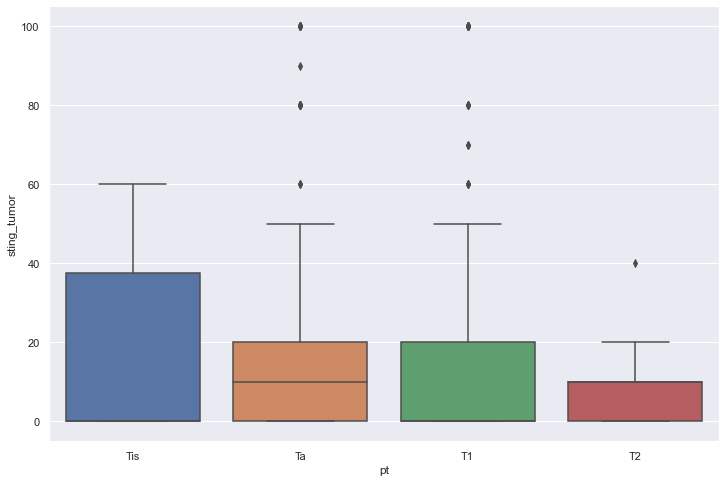

In [5]:
g = sns.boxplot(x='pt', y='sting_tumor', data=df)

## STING in peritumoral lymphocytes

In [6]:
df.groupby('pt')['sting_inflammatory'].describe().round()

count   mean   std    min    25%    50%    75%    max
pt                                                        
Tis    4.0   50.0  58.0    0.0    0.0   50.0  100.0  100.0
Ta    73.0   98.0   6.0   80.0  100.0  100.0  100.0  100.0
T1    69.0   97.0   7.0   80.0  100.0  100.0  100.0  100.0
T2     3.0  100.0   0.0  100.0  100.0  100.0  100.0  100.0

In [77]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['sting_inflammatory'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.08901153339993913

In [82]:
# Posthoc Dunn's test 
dunn = scikit_posthocs.posthoc_dunn([data['sting_inflammatory'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Tis        Ta        T1        T2
Tis  1.000000  0.585592  0.618193  0.641485
Ta   0.585592  1.000000  0.887942  0.897833
T1   0.618193  0.887942  1.000000  0.866293
T2   0.641485  0.897833  0.866293  1.000000

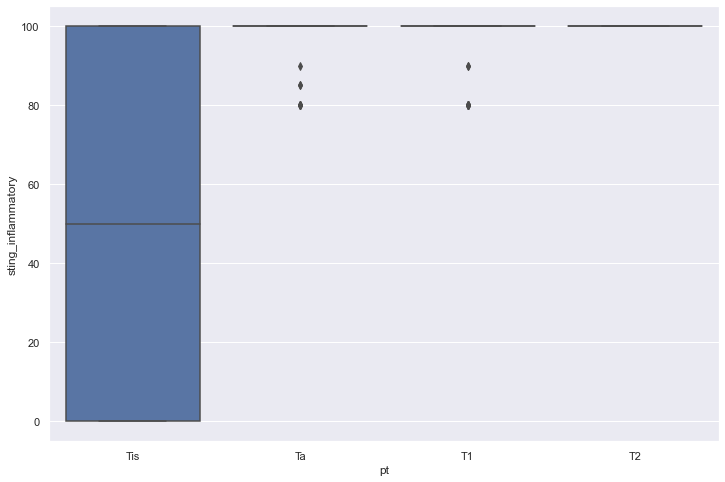

In [8]:
g = sns.boxplot(x='pt', y='sting_inflammatory', data=df)

## cGAS in tumor cells

In [9]:
df.groupby('pt')['cgas_tumor'].describe().round()

count  mean   std  min   25%   50%    75%    max
pt                                                   
Tis    6.0  47.0  45.0  0.0   5.0  50.0   80.0  100.0
Ta   135.0  63.0  40.0  0.0  20.0  80.0  100.0  100.0
T1   110.0  69.0  38.0  0.0  40.0  90.0  100.0  100.0
T2    10.0  14.0  26.0  0.0   0.0   0.0    9.0   80.0

In [79]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['cgas_tumor'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.00019729412587704903

In [83]:
# Posthoc Dunn's test 
dunn = scikit_posthocs.posthoc_dunn([data['cgas_tumor'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Tis        Ta        T1        T2
Tis  1.000000  0.504904  0.327670  0.395860
Ta   0.504904  1.000000  0.303542  0.028766
T1   0.327670  0.303542  1.000000  0.010174
T2   0.395860  0.028766  0.010174  1.000000

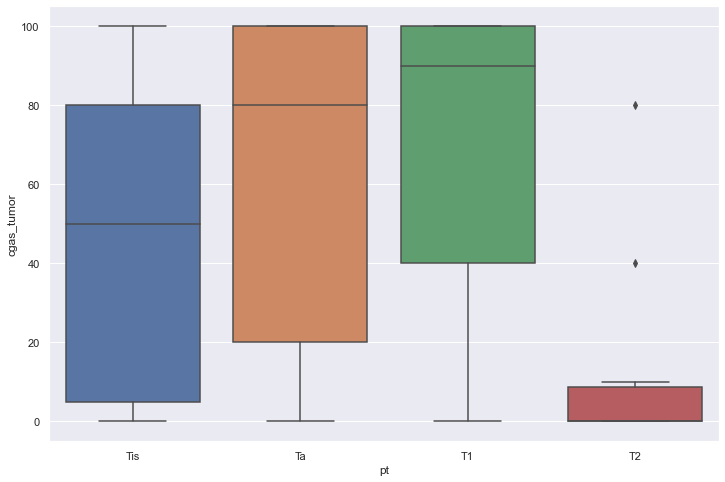

In [11]:
g = sns.boxplot(x='pt', y='cgas_tumor', data=df)

## cGAS in peritumoral lymphocytes

In [12]:
df.groupby('pt')['cgas_inflammatory'].describe().round()

count  mean   std  min  25%   50%   75%    max
pt                                                 
Tis    4.0   2.0   2.0  0.0  0.0   1.0   3.0    5.0
Ta    73.0  12.0  17.0  0.0  0.0   3.0  10.0   80.0
T1    69.0  13.0  21.0  0.0  0.0   5.0  20.0  100.0
T2     3.0  24.0  31.0  2.0  6.0  10.0  35.0   60.0

In [84]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['cgas_inflammatory'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.4093945306773973

In [85]:
# Posthoc Dunn's test 
dunn = scikit_posthocs.posthoc_dunn([data['cgas_inflammatory'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Tis        Ta        T1        T2
Tis  1.000000  0.695371  0.663932  0.566418
Ta   0.695371  1.000000  0.893997  0.687690
T1   0.663932  0.893997  1.000000  0.716158
T2   0.566418  0.687690  0.716158  1.000000

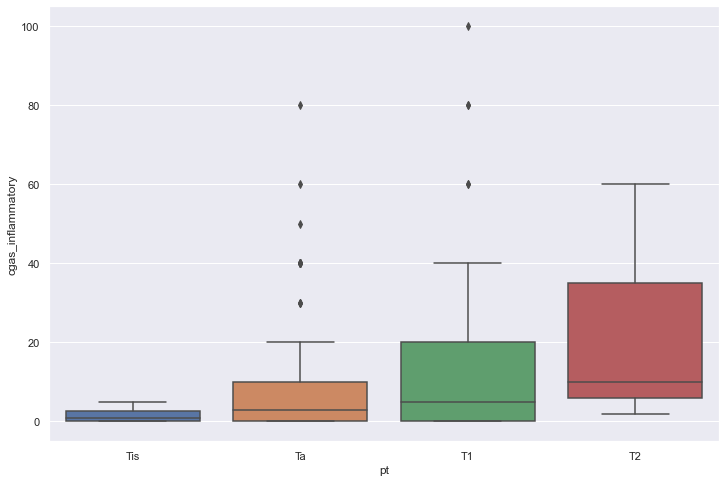

In [14]:
g = sns.boxplot(x='pt', y='cgas_inflammatory', data=df)

## pIRF3 in tumor cells

In [15]:
df.groupby('pt')['pirf3_tumor'].describe().round()

count  mean   std  min  25%  50%   75%    max
pt                                                
Tis    6.0   2.0   2.0  0.0  0.0  1.0   4.0    5.0
Ta   135.0  12.0  26.0  0.0  0.0  0.0   8.0  100.0
T1   111.0  13.0  24.0  0.0  0.0  0.0  10.0   80.0
T2    10.0   0.0   0.0  0.0  0.0  0.0   0.0    0.0

In [86]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['pirf3_tumor'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.13878519415477855

In [87]:
# Posthoc Dunn's test 
dunn = scikit_posthocs.posthoc_dunn([data['pirf3_tumor'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Tis        Ta        T1        T2
Tis  1.000000  0.997264  0.965048  0.426547
Ta   0.997264  1.000000  0.894842  0.208678
T1   0.965048  0.894842  1.000000  0.193864
T2   0.426547  0.208678  0.193864  1.000000

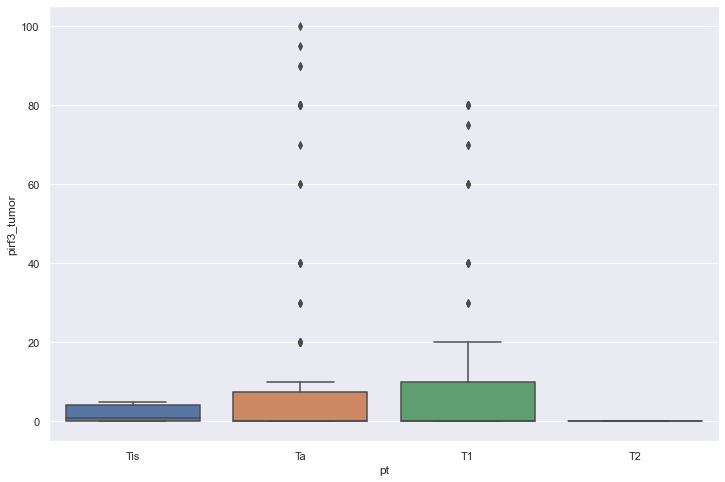

In [17]:
g = sns.boxplot(x='pt', y='pirf3_tumor', data=df)

## pIRF3 in peritumoral lymphocytes

In [18]:
df.groupby('pt')['pirf3_inflammatory'].describe().round()

count  mean   std  min  25%   50%   75%    max
pt                                                 
Tis    4.0  38.0  45.0  0.0  1.0  30.0  68.0   90.0
Ta    73.0  15.0  27.0  0.0  0.0   0.0  20.0  100.0
T1    69.0  12.0  26.0  0.0  0.0   0.0   5.0   90.0
T2     3.0  16.0  21.0  2.0  4.0   5.0  22.0   40.0

In [88]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['pirf3_inflammatory'].values for name, data in df.groupby('pt')], nan_policy='omit')[1]

0.10658685028473723

In [89]:
# Posthoc Dunn's test 
dunn = scikit_posthocs.posthoc_dunn([data['pirf3_inflammatory'].values for name, data in df.groupby('pt')])
pd.DataFrame(np.array(dunn), columns=levels, index=levels)

Tis        Ta        T1        T2
Tis  1.000000  0.718574  0.598010  0.962671
Ta   0.718574  1.000000  0.608041  0.707801
T1   0.598010  0.608041  1.000000  0.602789
T2   0.962671  0.707801  0.602789  1.000000

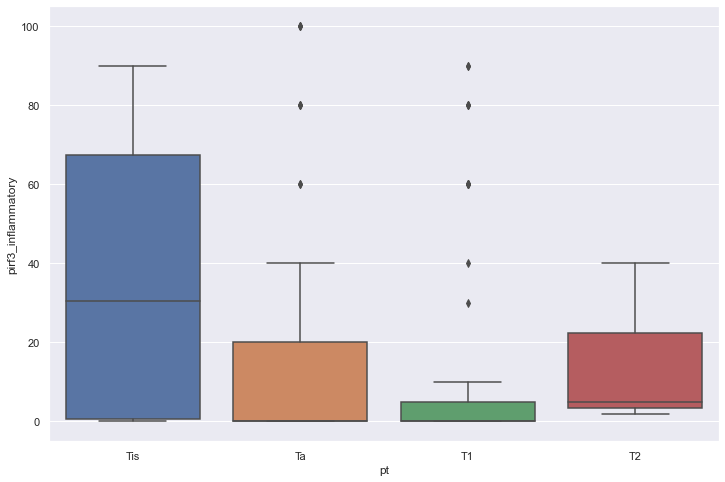

In [20]:
g = sns.boxplot(x='pt', y='pirf3_inflammatory', data=df)

# Marker expression by grade

## STING in tumor cells

In [21]:
df.groupby('grade')['sting_tumor'].describe().round()

count  mean   std  min  25%   50%   75%    max
grade                                                     
Low-grade    74.0  18.0  23.0  0.0  0.0  10.0  20.0   90.0
High-grade  112.0  24.0  35.0  0.0  0.0  10.0  30.0  100.0
Invasive     63.0  20.0  33.0  0.0  0.0   0.0  20.0  100.0

In [90]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['sting_tumor'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.3908389604604544

In [99]:
# Posthoc Dunn's test
levels = df['grade'].dropna().unique()
dunn = scikit_posthocs.posthoc_dunn([data['sting_tumor'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.725289  0.404672
High-grade   0.725289    1.000000  0.566780
Invasive     0.404672    0.566780  1.000000

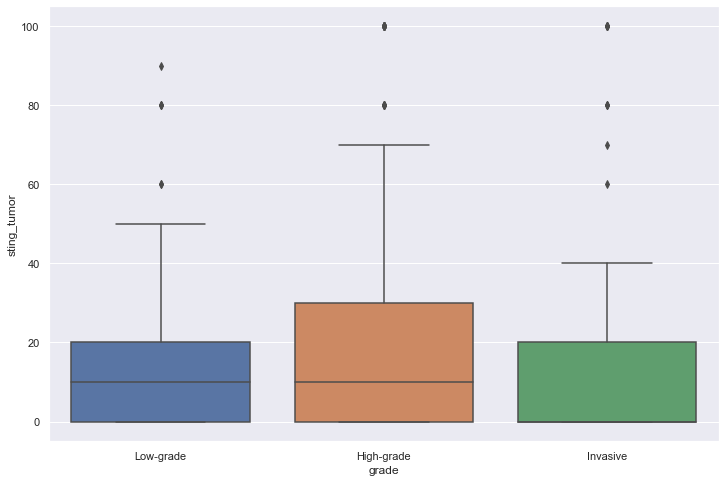

In [23]:
g = sns.boxplot(x='grade', y='sting_tumor', data=df)

## STING in peritumoral lymphocytes

In [24]:
df.groupby('grade')['sting_inflammatory'].describe().round()

count  mean  std   min    25%    50%    75%    max
grade                                                         
Low-grade    40.0  99.0  4.0  80.0  100.0  100.0  100.0  100.0
High-grade   60.0  96.0  8.0  80.0  100.0  100.0  100.0  100.0
Invasive     41.0  98.0  6.0  80.0  100.0  100.0  100.0  100.0

In [100]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['sting_inflammatory'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.0837750801265089

In [101]:
# Posthoc Dunn's test
dunn = scikit_posthocs.posthoc_dunn([data['sting_inflammatory'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.650573  0.931433
High-grade   0.650573    1.000000  0.717392
Invasive     0.931433    0.717392  1.000000

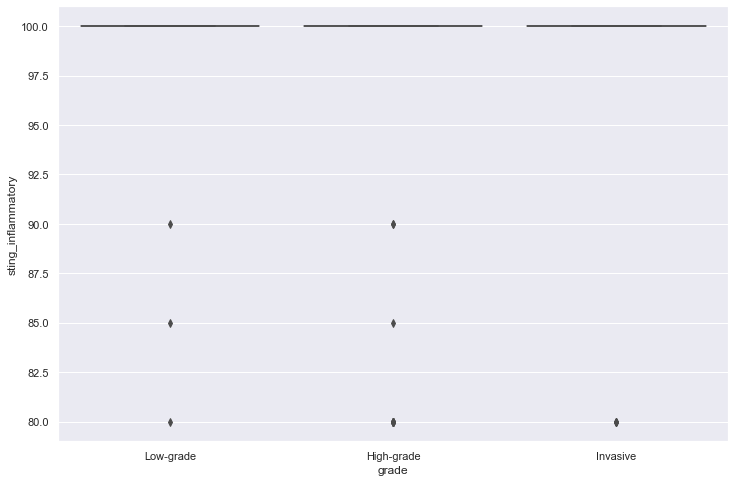

In [26]:
g = sns.boxplot(x='grade', y='sting_inflammatory', data=df)

## cGAS in tumor cells

In [27]:
df.groupby('grade')['cgas_tumor'].describe().round()

count  mean   std  min   25%   50%    75%    max
grade                                                       
Low-grade    74.0  66.0  38.0  0.0  32.0  90.0  100.0  100.0
High-grade  111.0  62.0  40.0  0.0  15.0  80.0  100.0  100.0
Invasive     63.0  64.0  40.0  0.0  20.0  80.0  100.0  100.0

In [102]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['cgas_tumor'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.6638019242102602

In [103]:
# Posthoc Dunn's test
dunn = scikit_posthocs.posthoc_dunn([data['cgas_tumor'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.635592  0.994406
High-grade   0.635592    1.000000  0.646620
Invasive     0.994406    0.646620  1.000000

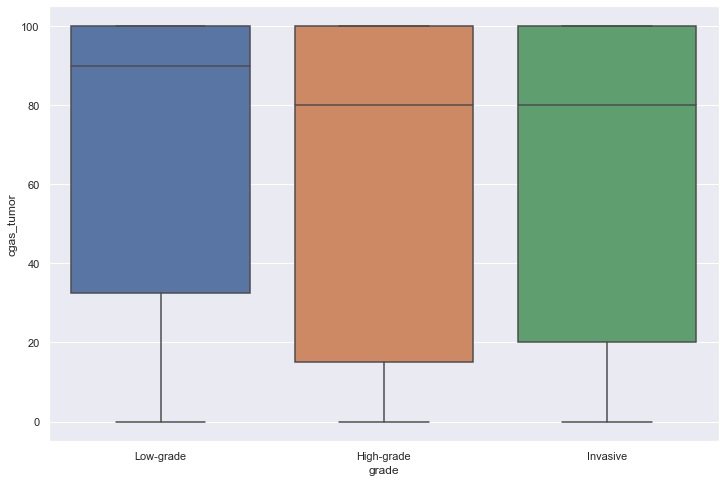

In [29]:
g = sns.boxplot(x='grade', y='cgas_tumor', data=df)

## cGAS in peritumoral lymphocytes

In [30]:
df.groupby('grade')['cgas_inflammatory'].describe().round()

count  mean   std  min  25%   50%   75%    max
grade                                                     
Low-grade    40.0   9.0  14.0  0.0  0.0   4.0  10.0   50.0
High-grade   60.0  13.0  20.0  0.0  0.0   5.0  20.0   80.0
Invasive     41.0  15.0  23.0  0.0  0.0  10.0  20.0  100.0

In [104]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['cgas_inflammatory'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.4994583781886013

In [105]:
# Posthoc Dunn's test
dunn = scikit_posthocs.posthoc_dunn([data['cgas_inflammatory'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.797822  0.680874
High-grade   0.797822    1.000000  0.846944
Invasive     0.680874    0.846944  1.000000

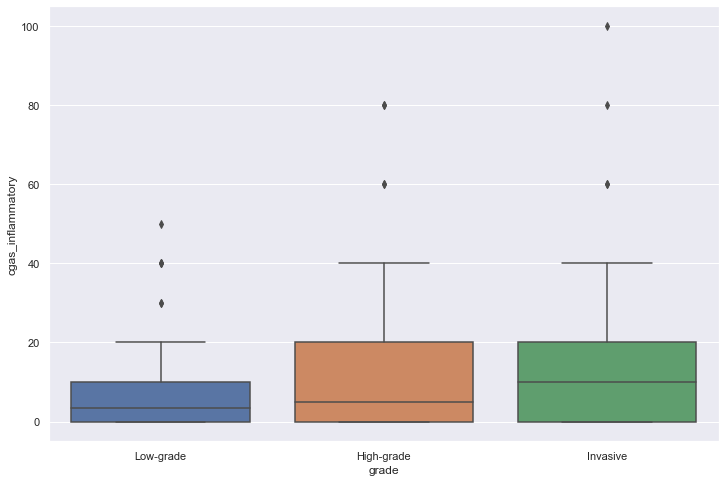

In [32]:
g = sns.boxplot(x='grade', y='cgas_inflammatory', data=df)

## pIRF3 in tumor cells

In [33]:
df.groupby('grade')['pirf3_tumor'].describe().round()

count  mean   std  min  25%  50%   75%    max
grade                                                    
Low-grade    74.0  11.0  24.0  0.0  0.0  0.0   5.0  100.0
High-grade  112.0  13.0  26.0  0.0  0.0  0.0  10.0   95.0
Invasive     63.0  11.0  23.0  0.0  0.0  0.0   8.0   80.0

In [106]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['pirf3_tumor'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.7694735922577323

In [107]:
dunn = scikit_posthocs.posthoc_dunn([data['pirf3_tumor'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.688388  0.880036
High-grade   0.688388    1.000000  0.828047
Invasive     0.880036    0.828047  1.000000

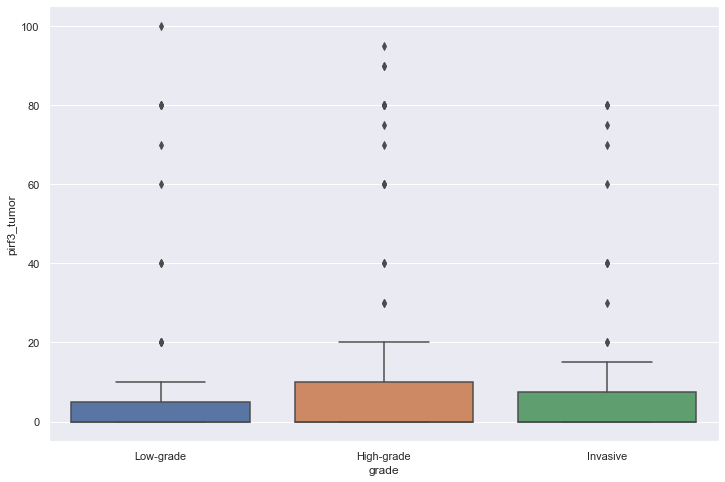

In [35]:
g = sns.boxplot(x='grade', y='pirf3_tumor', data=df)

## pIRF3 in peritumoral lymphocytes

In [36]:
df.groupby('grade')['pirf3_inflammatory'].describe().round()

count  mean   std  min  25%  50%   75%    max
grade                                                    
Low-grade    40.0   9.0  18.0  0.0  0.0  0.0  10.0   80.0
High-grade   60.0  20.0  31.0  0.0  0.0  2.0  30.0  100.0
Invasive     41.0  10.0  24.0  0.0  0.0  0.0   5.0   90.0

In [110]:
# P value (Kruskal-Wallis test)
scipy.stats.kruskal(*[data['pirf3_inflammatory'].values for name, data in df.groupby('grade')], nan_policy='omit')[1]

0.021150731550050702

In [111]:
dunn = scikit_posthocs.posthoc_dunn([data['pirf3_inflammatory'].values for name, data in df.groupby('grade')])
pd.DataFrame(np.array(dunn), index=levels, columns=levels)

Low-grade  High-grade  Invasive
Low-grade    1.000000    0.464062  0.956008
High-grade   0.464062    1.000000  0.424816
Invasive     0.956008    0.424816  1.000000

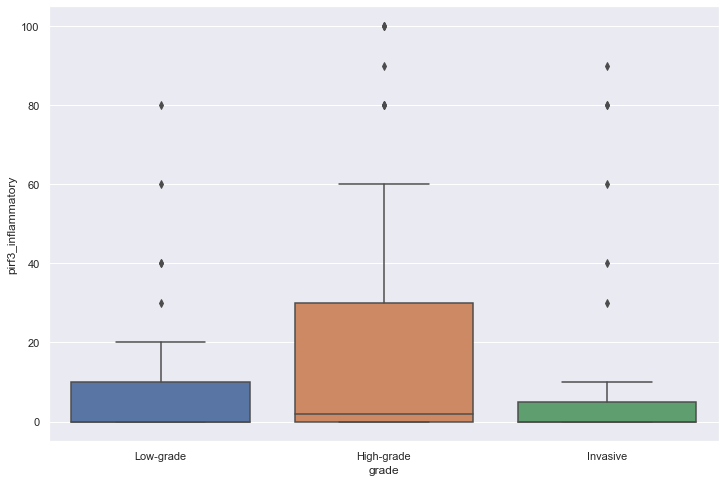

In [38]:
g = sns.boxplot(x='grade', y='pirf3_inflammatory', data=df)